# Aggregates in R

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Calculating-Column-Statistics" data-toc-modified-id="Calculating-Column-Statistics-2">Calculating Column Statistics</a></span><ul class="toc-item"><li><span><a href="#Common-Summary-Functions" data-toc-modified-id="Common-Summary-Functions-2.1">Common Summary Functions</a></span></li></ul></li><li><span><a href="#Calculating-Aggregate-Functions-I" data-toc-modified-id="Calculating-Aggregate-Functions-I-3">Calculating Aggregate Functions I</a></span></li><li><span><a href="#Calculating-Aggregate-Functions-II" data-toc-modified-id="Calculating-Aggregate-Functions-II-4">Calculating Aggregate Functions II</a></span></li><li><span><a href="#Combining-Grouping-with-Filter" data-toc-modified-id="Combining-Grouping-with-Filter-5">Combining Grouping with Filter</a></span></li><li><span><a href="#Combining-Grouping-with-Mutate" data-toc-modified-id="Combining-Grouping-with-Mutate-6">Combining Grouping with Mutate</a></span></li></ul></div>

### Introduction

Common aggregate statistics include mean, median, and standard deviation.

### Calculating Column Statistics

To combine all of the values from a column for a single calculation, use the dplyr function `summarize()`, which returns a new data frame containing the desired calculation.

**The general syntax is:**

```r
df %>% summarize(var_name = command(column_name, na.rm=TRUE))
```

* `df` is the data frame you are working with
* `var_name` is the name assigned to the column that stores the result of the summary function in the returned data frame
* `command` is the summary function applied to the column by `summarize()`
* `column_name` is the name of the column of `df` that is being summarized
* `na.rm=TRUE` is used to remove any missing values in the column before performing the calculation

#### Common Summary Functions

`Common summary functions` that can be given as an argument to `summarize()`:

Command | Description
:-------|:-----------
mean()  | Average of all values in column
median() | Median value of column
sd()    | Standard deviation of column
var()   | Variance of column
min()   | Minimum value in column
max()   | Maximum value in column
IQR()   | Interquartile range of column
n_distinct() | Number of unique values in column
sum()   | Sum values of column

### Calculating Aggregate Functions I

In [3]:
library(readr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
df <- read_csv('grades.csv')

Rows: 6 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): student, assignment_name
dbl (1): grade


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
head(df)

student,assignment_name,grade
<chr>,<chr>,<dbl>
Amy,Assignment 1,96
Amy,Assignment 2,87
Bob,Assignment 1,91
Bob,Assignment 2,75
Chris,Assignment 1,83
Chris,Assignment 2,88


1. What is the average grade for each student across all assignments.

In [7]:
grades <- df %>%
  group_by(student) %>%
  summarize(mean_grade = mean(grade))

grades

student,mean_grade
<chr>,<dbl>
Amy,91.5
Bob,83.0
Chris,85.5


Another summary function, especially for grouped data, `n()`, will return the count of the rows within a group.

In [9]:
grades <- df %>%
  group_by(student) %>%
  summarize(count = n())

grades

student,count
<chr>,<int>
Amy,2
Bob,2
Chris,2


### Calculating Aggregate Functions II

We can group by multiple columns by passing the column names as arguments to the `group_by` function.

The data set shows the number of sales at different store locations on different days of the week:

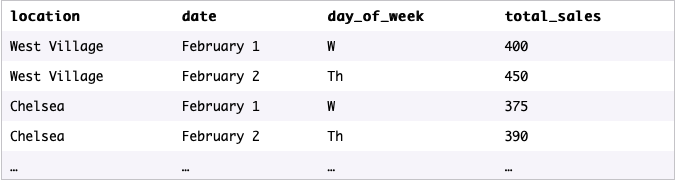

Calculate the average sales for each store on each day of the week across multiple months.

```r
df %>%
  group_by(location, day_of_week) %>%
  summarize(mean_total_sales = mean(total_sales))
```
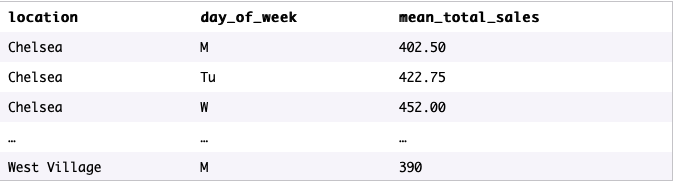

### Combining Grouping with Filter

`group_by()` can also be used with the dplyr function `filter()` to filter rows of a data frame based on per-group metrics.

An educational technology company offers online courses and collects user data in an `enrollments` data frame:

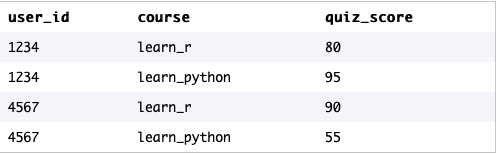

Identify all the enrollments in difficult courses, defined as courses with an average `quiz_score` less than `80`.

```r
enrollments %>%
  group_by(course) %>%
  filter(mean(quiz_score) < 80)
```

* `group_by()` groups the data frame by `course` into two groups:
`learn-r` and `learn-python`<br><br>
* `filter()` will keep all the rows of the data frame whose per-group (per-course) average `quiz-score` is less than 80

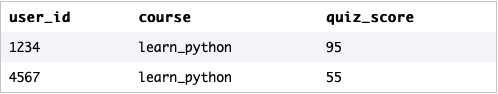

* The average `quiz_score` for the `learn-r` course is `85`, so all the rows of `enrollments` with a value of `learn-r` in the `course` column are filtered out.<br><br>

* The average `quiz_score` for the `learn-python` course is `75`, so all the rows of `enrollments` with a value of `learn-python` in the `course` column remain.

### Combining Grouping with Mutate

`group_by()` can also be used with the dplyr function `mutate()` to add columns to a data frame that involve per-group metrics.

Using the above educational technology company's `enrollments` table, add a new column to the data frame that stores the difference between a row's `quiz_score` and the average `quiz_score` for that row's course:

```r
enrollments %>%
  group_by(course) %>%
  mutate(diff_from_course_mean = quiz_score - mean(quiz_score))
```

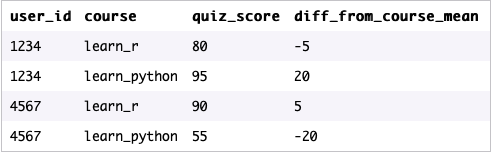

* `group_by()` groups the data frame by course into two groups: `learn-r` and `learn-python`<br><br>    
* The average `quiz_score` for the `learn-r` course is `85`, so `diff_from_course_mean` is calculated as `quiz_score - 85` for all the rows of `enrollments` with a value of `learn-r` in the course column.<br><br>    
* Similarly, for all rows of `enrollments` with a value of `learn-python` in the course column, the difference is calculated as `quiz_score -75`<br><br>